C:\Users\Freef\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clustering Evaluation Metrics:
Silhouette Score          : 0.48
Calinski-Harabasz Index   : 157.36


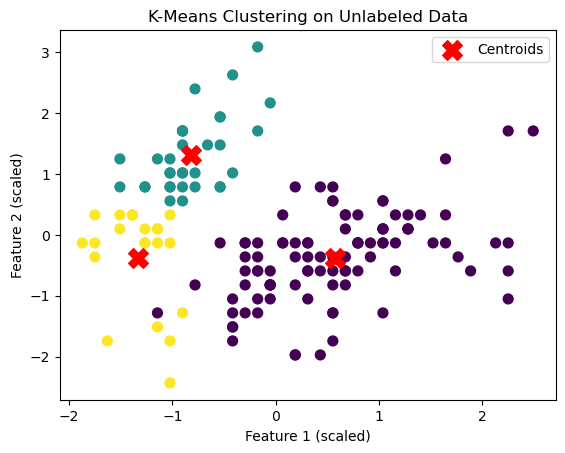

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Step 1: Load dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Step 2: Preprocessing – scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Cluster formation – K-Means
k = 3  # number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Step 4: Evaluate clustering quality
sil_score = silhouette_score(X_scaled, clusters)
ch_score = calinski_harabasz_score(X_scaled, clusters)

print("Clustering Evaluation Metrics:")
print("Silhouette Score          :", round(sil_score, 3))
print("Calinski-Harabasz Index   :", round(ch_score, 3))

# Step 5: Visualization (2D scatter using first two features)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            color='red', marker='X', s=200, label='Centroids')
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.title("K-Means Clustering on Unlabeled Data")
plt.legend()
plt.show()
